In [27]:
import numpy as np
import pandas as pd
import requests
import pymatgen.core as pmg
import warnings
import matplotlib.pyplot as plt
# !pip install pip install mp-api
# !pip install pymatgen

In [3]:

MP_API_KEY = "XizEPyfLpTFxjMrtCpObYPshzopUe5aG"

In [4]:
response = requests.get("https://api.materialsproject.org/materials/mp-149/?fields=material_id%2Cstructure&all_fields=false", 
                        headers={"X-API-KEY": MP_API_KEY})

print(response.text)

{"detail":"Not Found"}


In [5]:
#helper fn to shorten lists
def shortlist(long_list, n=5):
    print("First {} of {} items:".format(min(n, 5), len(long_list)))
    for item in long_list[0:n]:
        print(item)

In [6]:
from mp_api.client import MPRester
import json
with MPRester("XizEPyfLpTFxjMrtCpObYPshzopUe5aG") as mpr:
    docs = mpr.summary.search(material_ids=["mp-149"])

docs[0]

No module named 'phonopy'
No module named 'phonopy'


C:\Users\yashb\AppData\Local\Temp\ipykernel_24960\3305843628.py:4: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(material_ids=["mp-149"])


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

MPDataDoc<SummaryDoc>(
builder_meta=EmmetMeta(emmet_version='0.72.20', pymatgen_version='2023.11.12', pull_request=990, database_version='2023.11.1', build_date=datetime.datetime(2023, 11, 22, 19, 46, 57, 168000), license='BY-C'),
nsites=2,
elements=[Element Si],
nelements=1,
composition=Composition('Si2'),
composition_reduced=Composition('Si1'),
formula_pretty='Si',
formula_anonymous='A',
chemsys='Si',
volume=40.32952684741405,
density=2.312800253345134,
density_atomic=20.164763423707026,
symmetry=SymmetryData(crystal_system=<CrystalSystem.cubic: 'Cubic'>, symbol='Fd-3m', number=227, point_group='m-3m', symprec=0.1, version='2.0.2'),
property_name='summary',
material_id=MPID(mp-149),
deprecated=False,
deprecation_reasons=None,
last_updated=datetime.datetime(2023, 11, 22, 19, 46, 57, 169000),
origins=[PropertyOrigin(name='structure', task_id=MPID(mp-1947498), last_updated=datetime.datetime(2021, 3, 5, 11, 47, 3, 84000)), PropertyOrigin(name='energy', task_id=MPID(mp-1947498), last_upda

In [7]:
example_doc = docs[0]

mpid = example_doc.material_id
formula = example_doc.formula_pretty
formula, mpid

('Si', MPID(mp-149))

In [8]:
#list of available fields
list_of_available_fields = mpr.summary.available_fields
temp = list_of_available_fields[0]
list_of_available_fields[0] = list_of_available_fields[14]
list_of_available_fields[14] = temp
list_of_available_fields


C:\Users\yashb\AppData\Local\Temp\ipykernel_24960\285861960.py:2: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  list_of_available_fields = mpr.summary.available_fields


['material_id',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'property_name',
 'builder_meta',
 'deprecated',
 'deprecation_reasons',
 'last_updated',
 'origins',
 'warnings',
 'structure',
 'task_ids',
 'uncorrected_energy_per_atom',
 'energy_per_atom',
 'formation_energy_per_atom',
 'energy_above_hull',
 'is_stable',
 'equilibrium_reaction_energy_per_atom',
 'decomposes_to',
 'xas',
 'grain_boundaries',
 'band_gap',
 'cbm',
 'vbm',
 'efermi',
 'is_gap_direct',
 'is_metal',
 'es_source_calc_id',
 'bandstructure',
 'dos',
 'dos_energy_up',
 'dos_energy_down',
 'is_magnetic',
 'ordering',
 'total_magnetization',
 'total_magnetization_normalized_vol',
 'total_magnetization_normalized_formula_units',
 'num_magnetic_sites',
 'num_unique_magnetic_sites',
 'types_of_magnetic_species',
 'bulk_modulus',
 'shear_modulus',
 'universal_anisotropy',
 'homoge

In [9]:
with MPRester(MP_API_KEY) as mpr:
    print(mpr.thermo.available_fields)

C:\Users\yashb\AppData\Local\Temp\ipykernel_24960\1355330979.py:2: DeprecationWarning: Accessing thermo data through MPRester.thermo is deprecated. Please use MPRester.materials.thermo instead.
  print(mpr.thermo.available_fields)


['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'thermo_type', 'thermo_id', 'uncorrected_energy_per_atom', 'energy_per_atom', 'energy_uncertainy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'decomposition_enthalpy', 'decomposition_enthalpy_decomposes_to', 'energy_type', 'entry_types', 'entries']


Pymatgen


______________________________


In [38]:


with MPRester(MP_API_KEY) as mpr:
  def read_first_column(filename):
      # Read the CSV file into a pandas DataFrame
      df = pd.read_csv(filename)

      # Extract the first column and convert it to a list
      first_column_values = df.iloc[:, 0].tolist()

      return first_column_values

  # Example usage:
  filename = "mp-ids-3402.csv"
  first_column_values = read_first_column(filename)
  # print("First column values:", first_column_values)
  material_ids = first_column_values
  docs = mpr.materials.summary.search(material_ids=material_ids) 

df = pd.DataFrame(columns=['material_id','formula_pretty', 'energy_per_atom', 'formation_energy_per_atom',
                   'band_gap',  'efermi', 'is_metal',  'bulk_modulus',  
                    'shear_modulus', 'homogeneous_poisson'])


# Access information about each crystal
rctr = 0
for doc in docs:
    warnings.filterwarnings("ignore", category=FutureWarning)
    df.loc[rctr] = {'material_id':doc.material_id, 'formula_pretty':doc.formula_pretty,    
                    'energy_per_atom':doc.energy_per_atom,  'formation_energy_per_atom':doc.formation_energy_per_atom,'band_gap':doc.band_gap,  'efermi':doc.efermi,  
                    'is_metal':doc.is_metal, 
                    'bulk_modulus':doc.bulk_modulus,  
                    'shear_modulus':doc.shear_modulus, 'homogeneous_poisson':doc.homogeneous_poisson}


    rctr+=1

df




Retrieving SummaryDoc documents:   0%|          | 0/3201 [00:00<?, ?it/s]

,material_id,formula_pretty,energy_per_atom,formation_energy_per_atom,band_gap,efermi,is_metal,bulk_modulus,shear_modulus,homogeneous_poisson
0,mp-21464,CoReB,-24.557722,-0.227322,0.0,8.137121,True,"{'voigt': 352.377, 'reuss': 351.893, 'vrh': 35...","{'voigt': 152.011, 'reuss': 93.78, 'vrh': 122....",0.344
1,mp-10394,CrCoGe,-7.215667,-0.079170,0.0,7.531247,True,"{'voigt': 186.094, 'reuss': 181.562, 'vrh': 18...","{'voigt': 76.63, 'reuss': 71.531, 'vrh': 74.08}",0.322
2,mp-1941,GaNi,-12.067912,-0.355665,0.0,7.629778,True,"{'voigt': 152.55, 'reuss': 152.55, 'vrh': 152.55}","{'voigt': 52.973, 'reuss': 32.215, 'vrh': 42.594}",0.372
3,mp-2025,HfBe5,-5.005097,-0.229388,0.0,4.210674,True,"{'voigt': 130.988, 'reuss': 130.924, 'vrh': 13...","{'voigt': 124.641, 'reuss': 116.19, 'vrh': 120...",0.148
4,mp-889,Cr3B4,-11.005136,-0.347215,0.0,8.690741,True,"{'voigt': 301.792, 'reuss': 299.627, 'vrh': 30...","{'voigt': 207.139, 'reuss': 204.181, 'vrh': 20...",0.222
...,...,...,...,...,...,...,...,...,...,...
3196,mp-866152,TiBeCo2,-6.897446,-0.422011,0.0,6.143854,True,"{'voigt': 191.214, 'reuss': 191.214, 'vrh': 19...","{'voigt': 105.101, 'reuss': 104.896, 'vrh': 10...",0.268
3197,mp-13503,ScZn2,-3.297138,-0.346486,0.0,3.617106,True,"{'voigt': 81.142, 'reuss': 81.113, 'vrh': 81.128}","{'voigt': 49.655, 'reuss': 49.596, 'vrh': 49.625}",0.246
3198,mp-559,YPd3,-23.180417,-0.881677,0.0,5.260351,True,"{'voigt': 124.541, 'reuss': 124.541, 'vrh': 12...","{'voigt': 52.197, 'reuss': 44.494, 'vrh': 48.346}",0.328
3199,mp-1953,TiAl,-10.281885,-0.446957,0.0,6.808373,True,"{'voigt': 113.507, 'reuss': 113.46, 'vrh': 113...","{'voigt': 74.422, 'reuss': 62.49, 'vrh': 68.456}",0.249


In [39]:
# removing rows with no bulk modulus and other parameter data (purely missing data, independent of any trend so cannot be imputed)
# df = df.dropna(subset=['bulk_modulus'])
# df

In [26]:
# df.to_excel("materialswithprop.xlsx")



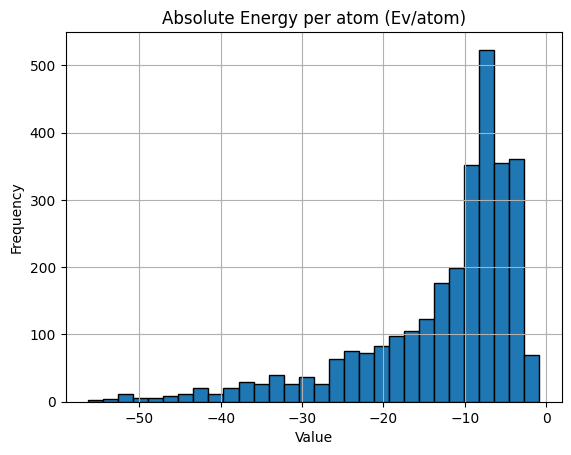

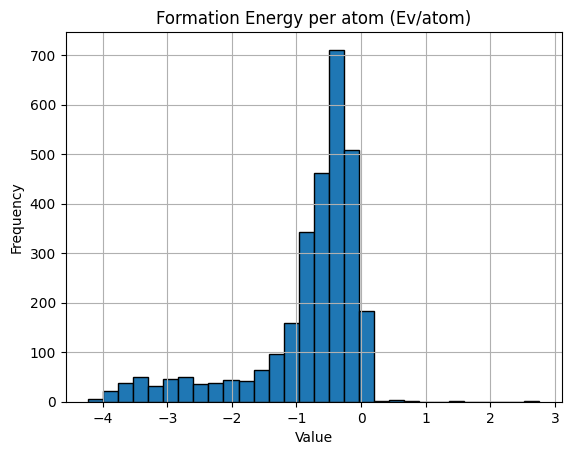

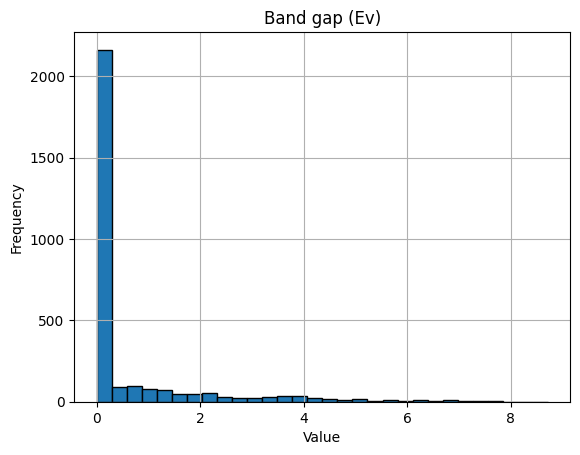

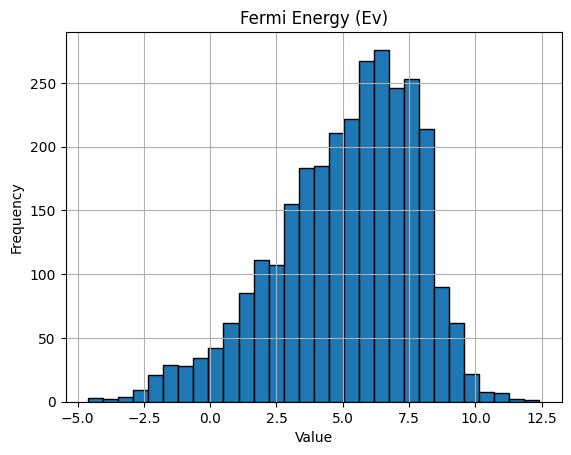

In [37]:
# Plot histograms for different properties
colnames = ['Absolute Energy per atom (Ev/atom)', 'Formation Energy per atom (Ev/atom)', 'Band gap (Ev)', 'Fermi Energy (Ev)']
for i,j in zip(df.columns[2:6], colnames):
    plt.hist(df[i], bins=30, edgecolor='black')
    plt.title(f'{j}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()